# STA 208: Homework 4
This is based on the material in Chapters 5,6 of 'Elements of Statistical Learning' (ESL), in addition to lectures 10-13.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


## Transfusion dataset
Read in the transfusion data using the code below.

In [2]:
import numpy as np
from sklearn.preprocessing import scale

In [4]:
Dtrans = np.loadtxt("transfusion.data",dtype=np.str_,delimiter=",")
X = np.array(Dtrans[1:,0:4],dtype=float)
y = np.array(Dtrans[1:,4],dtype=float)
X = scale(X)

__Exercise 1.1__ (10 pts) Use 5-fold cross validation, leave-one-out CV, and a 50% holdout to tune the bandwidth and ridge penalty parameter for the RBF kernel for SVMs.  Qualitatively compare the results.

I have choosen five values to tune bandwidth, and the answer shows that for each method, increasing C value will increase then decrease the accuracy, except for  50% holdout, but the accuracy seems not sensity to C. What's more, the accuracy for 50% holdout seems to outperform leave-one-out CV, which is a little bit better than 5-fold cross validation. The best bandwidth for these three method seems to be 20, 10 and over 100. On the other hand, the running time for leave-one-out method is much more slower than the other two since it will run n times for each condition, and 50% holdout is the fastest one. When we tune the ridge penalty from 0 to 5, what we find is the accuray seems to increase than decrease except for 50% holdout, this might happened because the ridge penalty is still not large enough. In addition, the best accuracy and average accuracy rank for these three method is 50% holdout higher than leave-one-out CV, which is little bit higher than 5-fold cross validation. For the best accracy and ridge penalty paramet I list them below.

method | best accuracy | best ridge penalty
---- | --- | ---
5-fold cross validation | 0.791525727069 | 1.26262626263
leave-one-out CV | 0.79679144385 |1.76767676768
50% holdout | 0.844919786096 | 3.83838383838

In [1]:
from sklearn import svm
import sklearn.linear_model as skl_lm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import LeaveOneOut
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve,confusion_matrix, classification_report
%matplotlib inline

In [122]:
C = [0.1 ,0.5 , 1.0, 3.0, 10, 20 , 50 ,100 ]
methods = ['5-fold cross validation', 'leave-one-out CV', '50% holdout' ]

In [124]:
timelist = []
loo = LeaveOneOut()
kfold = KFold(n_splits=5)
idx = np.random.choice(np.arange(len(X)),374, replace=False)
test = list(set(idx).intersection(set(range(748))))
for method in methods:
    print 'tune method is ',method
    for i in C:
        A = time.clock()
        svc = svm.SVC(C=i)
        if method == '5-fold cross validation':
            print 'C =',i,' score =',cross_val_score(svc, X, y, cv=kfold).mean()
        elif method == 'leave-one-out CV':
            print 'C =',i,' score =',cross_val_score(svc, X, y, cv=loo).mean()
        else:
            print 'C =',i,' score =',svc.fit(X[idx], y[idx]).score(X[test], y[test])
        B = time.clock()
        timelist.append(B-A)

tune method is  5-fold cross validation
C = 0.1  score = 0.762102908277
C = 0.5  score = 0.756742729306
C = 1.0  score = 0.768805369128
C = 3.0  score = 0.770156599553
C = 10  score = 0.780859060403
C = 20  score = 0.790201342282
C = 50  score = 0.780850111857
C = 100  score = 0.770165548098
tune method is  leave-one-out CV
C = 0.1  score = 0.762032085561
C = 0.5  score = 0.770053475936
C = 1.0  score = 0.77807486631
C = 3.0  score = 0.786096256684
C = 10  score = 0.795454545455
C = 20  score = 0.792780748663
C = 50  score = 0.791443850267
C = 100  score = 0.78743315508
tune method is  50% holdout
C = 0.1  score = 0.729946524064
C = 0.5  score = 0.772727272727
C = 1.0  score = 0.775401069519
C = 3.0  score = 0.786096256684
C = 10  score = 0.794117647059
C = 20  score = 0.804812834225
C = 50  score = 0.807486631016
C = 100  score = 0.807486631016


In [91]:
for i in range(3):
    print 'avg running time of ',methods[i],' is ',np.mean(timelist[i*8:(i+1)*8]),' seconds'

avg running time of  5-fold cross validation  is  0.0654683687548  seconds
avg running time of  leave-one-out CV  is  11.9183470682  seconds
avg running time of  50% holdout  is  0.00573383810528  seconds


In [103]:
xx = np.linspace(0,5,100)[1:]
five_fold = []
leaveone = []
holdout = []
for method in methods:
    for i in xx:
        svc = svm.SVC(gamma=i)
        if method == '5-fold cross validation':
            five_fold.append(cross_val_score(svc, X, y, cv=kfold).mean())
        elif method == 'leave-one-out CV':
            leaveone.append(cross_val_score(svc, X, y, cv=loo).mean())
        else:
            holdout.append(svc.fit(X[idx], y[idx]).score(X[test], y[test]))

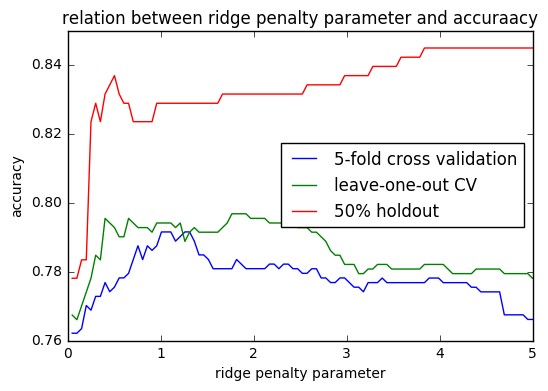

In [110]:
plt.figure()
plt.plot(xx,five_fold,label=methods[0])
plt.plot(xx,leaveone,label=methods[1])
plt.plot(xx,holdout,label=methods[2])
plt.legend(loc='right' )
plt.xlabel('ridge penalty parameter')
plt.ylabel('accuracy')
plt.title('relation between ridge penalty parameter and accuraacy')
plt.show()

In [119]:
print methods[0],'best accuracy:',max(five_fold),'best ridge penalty:',xx[np.argmax(five_fold)]
print methods[1],'best accuracy:',max(leaveone),'best ridge penalty:',xx[np.argmax(leaveone)]
print methods[2],'best accuracy:',max(holdout),'best ridge penalty:',xx[np.argmax(holdout)]

5-fold cross validation best accuracy: 0.791525727069 best ridge penalty: 1.26262626263
leave-one-out CV best accuracy: 0.79679144385 best ridge penalty: 1.76767676768
50% holdout best accuracy: 0.844919786096 best ridge penalty: 3.83838383838


__Exercise 1.2__ (10 pts) Select one of these methods for tuning the bandwidth parameters and make this a function that takes in a dataset, performs cross-validation, and outputs the tuning parameters.  Make a training and test set split and tune parameters for linear SVMs, RBF kernel SVMs, and logistic regression on the training set, then compare their performances on the test set using ROC and PR curves.

In [6]:
def best_band_5fold(X,y,model,linear=False):
    '''
    find best bandwidth
    input X, y , MODEL being used to fit, whether use linear svc
    output best bandwidth
    '''
    C = np.linspace(0.000001,31,100)
    five_fold = []
    kfold = KFold(n_splits=5)
    for i in C:
        svc = model(C=i)
        if linear:
            svc = model(C=i,kernel='linear')
        five_fold.append(cross_val_score(svc, X, y, cv=kfold).mean())
    return C[np.argmax(five_fold)]
print 'best bandwith for RBF SVM',best_band_5fold(X,y,svm.SVC)
print 'best bandwith for linearSVM',best_band_5fold(X,y,svm.SVC,linear=True)
print 'best bandwith for logistic',best_band_5fold(X,y,skl_lm.LogisticRegression)

best bandwith for RBF SVM 29.1212121818
best bandwith for linearSVM 1e-06
best bandwith for logistic 0.939394909091


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
logit = skl_lm.LogisticRegression(solver='newton-cg', C=0.155779889447)
logit.fit(X_train,y_train)
prob = logit.predict_proba(X_test)
logfpr, logtpr, logthr = roc_curve(y_test, prob[:,1])
logpre, logrec, logthresh = precision_recall_curve(y_test, prob[:,1])
svc = svm.SVC(probability=True, C=29.1306533266)
svc.fit(X_train,y_train)
pred = svc.predict_proba(X_test)
svcfpr, svctpr, svcthr = roc_curve(y_test, pred[:,1])
svcpre, svcrec, svcthresh = precision_recall_curve(y_test, pred[:,1])
lsvm = svm.SVC(C=1e-06,kernel='linear',probability=True)
lsvm.fit(X_train,y_train)
pred = lsvm.predict_proba(X_test)
lsvmfpr, lsvmtpr, lsvmthr = roc_curve(y_test, pred[:,1])
lsvmpre, lsvmrec, lsvmthresh = precision_recall_curve(y_test, pred[:,1])

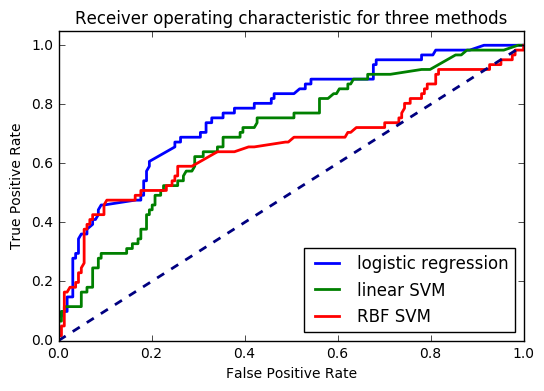

In [23]:
plt.figure()
lw = 2
plt.plot(logfpr,logtpr,lw=lw, label='logistic regression')
plt.plot(lsvmfpr,lsvmtpr,lw=lw, label='linear SVM')
plt.plot(svcfpr,svctpr,lw=lw, label='RBF SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for three methods')
plt.legend(loc="lower right")
plt.show()

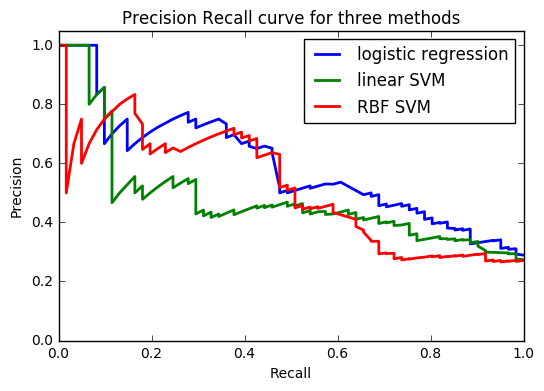

In [24]:
plt.figure()
lw = 2
plt.plot(logrec,logpre,lw=lw, label='logistic regression')
plt.plot(lsvmrec,lsvmpre,lw=lw, label='linear SVM')
plt.plot(svcrec,svcpre,lw=lw, label='RBF SVM')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for three methods')
plt.legend(loc=1)
plt.show()

## Reuters dataset
The following dataset contains stemmed words from the Reuters dataset, which is articles.  Each line starts with a topic label (of 8 topics) and then has all of the terms in the document.

In [7]:
from collections import Counter
import scipy.sparse as sp

In [8]:
def read_corpus(filename):
    """
    Read a R8 corpus
    Input: filename
    Output: the corpus which is a list of documents with topic labels and stemmed terms
    """
    corpus = []
    DF = Counter()
    with open(filename,"r") as f:
        for line in f:
            label, terms = line.split('\t')
            terms = terms.strip().split()
            label = label.strip()
            corpus.append([label,Counter(terms)])
            DF += Counter(set(terms))
    return(corpus, DF)

In [9]:
train_corpus, train_DF = read_corpus('r8-train-stemmed.txt')
test_corpus, test_DF = read_corpus('r8-test-stemmed.txt')

In [10]:
# You should use the document frequency for the whole corpus
full_DF = train_DF + test_DF

In [11]:
## dict_list is the list of dictionary terms, 
## while dict_index can take you from the term back to its index
dict_list = full_DF.keys()
dict_index = {t:i for i,t in enumerate(dict_list)}

In [12]:
n, p = len(train_corpus), len(full_DF)
logN = np.log(len(train_corpus) + len(test_corpus))

In [13]:
X_tr = sp.lil_matrix((n,p))

In [14]:
## This creates the sparse training matrix, you will need to modify this to create the test matrix.
## I am using a normalized TFIDF transform below, figure out what it is doing.
for i in xrange(n):
    tpc, doc = train_corpus[i]
    vec = np.array([(logN - np.log(train_DF[term]))*doc[term] for term in doc.keys()])
    vec = vec / np.linalg.norm(vec)
    X_tr[i,[dict_index[term] for term in doc.keys()]] = vec

__Exercise 2.1__ (10 pts) Compute Kmeans with 8 clusters on the training set.  For each cluster, what are the 10 terms that have the highest components in the cluster center vectors?  What are the sizes of the clusters?  Compute a 'confusion matrix' to compare these 8 clusters to the labelled topics (I want an 8 x 8 matrix of counts of documents in each topic and cluster - there are 8 topics).

I list the top 10 terms in the lower cell, and the size of cluster is 17387. At the last cell, I provide the confusion matrix, and the meaning of each number is provided in previous cell.

In [66]:
from sklearn.cluster import KMeans
cluster_center = KMeans().fit(X_tr).cluster_centers_

10 highest components terms in each the cluster center vectors

In [51]:
for cluster in cluster_center:
    print [name for name, age in dict_index.items() if age in np.argsort(cluster)[-10:]]

['oper', 'mln', 'qtr', 'ct', 'shr', 'loss', 'net', 'rev', 'profit', 'dlr']
['prime', 'england', 'bank', 'market', 'stg', 'pct', 'monei', 'bill', 'rate', 'fed']
['prior', 'set', 'payout', 'ct', 'march', 'april', 'div', 'pai', 'qtly', 'record']
['oper', 'mln', 'qtr', 'year', 'ct', 'shr', 'net', 'rev', 'dlr', 'avg']
['for', 'offer', 'compani', 'inc', 'pct', 'corp', 'share', 'and', 'will', 'dlr']
['mln', 'year', 'quarter', 'loss', 'net', 'billion', 'earn', 'profit', 'and', 'dlr']
['opec', 'trade', 'barrel', 'offici', 'japan', 'that', 'price', 'oil', 'and', 'crude']
['split', 'dividend', 'board', 'quarterli', 'april', 'stock', 'payabl', 'declar', 'share', 'record']


In [58]:
print 'sizes of the clusters is ',cluster.size

sizes of the clusters is  17387


In [17]:
y_label = {}
y = [i[0] for i in train_corpus]
for i,j in zip(set(y),range(8)):
    y_label[i] = j
print(y_label)
y = [y_label[i]  for i in y if i in y_label]
pred = KMeans().fit_predict(X_tr,y)

{'earn': 0, 'money-fx': 1, 'trade': 2, 'acq': 3, 'grain': 4, 'interest': 5, 'crude': 6, 'ship': 7}


confusion matrix to for these 8 clusters

In [118]:
confusion_matrix(y, pred)

array([[ 708,  645,   34,    6,  451,  220,   57,  719],
       [  28,    0,  127,    0,    0,    0,   51,    0],
       [  19,    0,  231,    0,    0,    0,    1,    0],
       [1561,    0,   28,    4,    0,    2,    1,    0],
       [  38,    0,    3,    0,    0,    0,    0,    0],
       [  13,    0,  175,    0,    0,    0,    2,    0],
       [  39,    0,    3,  210,    0,    0,    1,    0],
       [ 107,    0,    1,    0,    0,    0,    0,    0]])

__Exercise 2.2__ (10 pts) Reverse the roles of words and documents and perform hierarchical agglomerative clustering (you can just transpose X) up to 40 clusters.  Compare the dendrograms for three different linkage types, and try to make sense of the resulting clusters.

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

For ward method, it tends to minimize the sum of square in each group. The complete method defines the distance between two groups as the distance between their two farthest-apart members, and average defines the distance between groups as the average
distance between each of the members. According to the plot, we find Clusters are compact, which means the observations within them are relatively close together (small dissimilarities)
as compared with observations in different clusters. Then I find the 1000 most common words in the training set and print the below, the answers shows that the dendrograme we got use most common 1000 words will give the similar answer when we use ward linkage, for the other two, there are little difference between those 1000 most common words and whold words set. 

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
X_transp = X_tr.T

In [21]:
def draw_dendrograme(X_transp ,num, method):
    '''
    draw dendrograme for different linkage type
    num is cluster number(int), method is linkage type(str)
    '''
    clusterer = AgglomerativeClustering(n_clusters=num, linkage=method)
    MODEL1 = clusterer.fit(X_transp.toarray())
    model1_list = MODEL1.labels_
    cluster_dict = {}
    for i in range(len(model1_list)):
        if model1_list[i] not in cluster_dict:
            cluster_dict[model1_list[i]] = [i]
        else:
            cluster_dict[model1_list[i]].append(i)
    center=[]
    for i in range(40):
        center.append(np.mean(X_transp[cluster_dict[i],:],axis=0))
    ceterarray = np.array(center).reshape(40,5485)
    Z = linkage(ceterarray, method=method )
    plt.figure()
    plt.title('dendrograms for '+ method+' linkage type')
    dn = dendrogram(Z)
    plt.show()

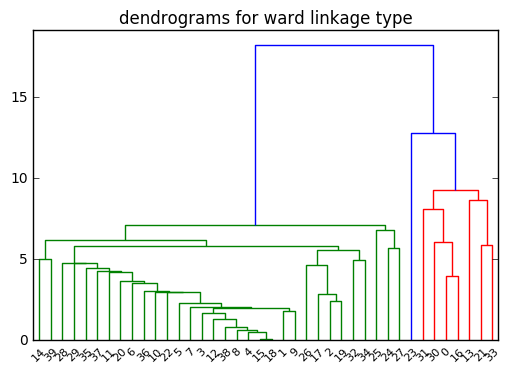

In [44]:
draw_dendrograme(X_transp, 40, 'ward')

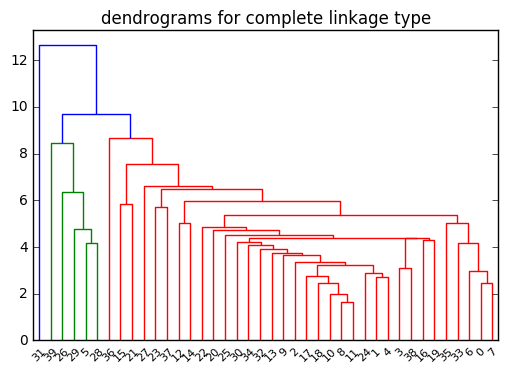

In [42]:
draw_dendrograme(X_transp, 40, 'complete')

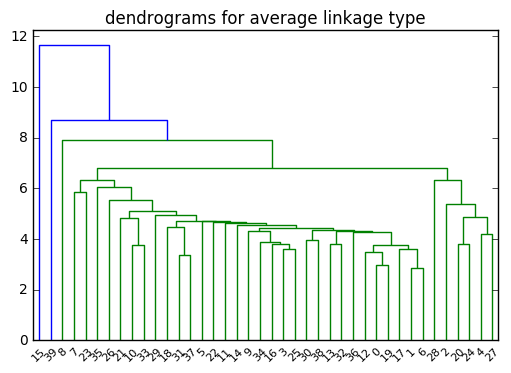

In [43]:
draw_dendrograme(X_transp, 40, 'average')

#### 1000 most common words in the training set

In [22]:
#1000 most common words in the training set instead
top_1000 = sorted(train_DF.items(), key=lambda x: x[1],reverse=True)[:1000]
top_1000_index = [dict_index[i[0]] for i in top_1000]
X_1000 = X_transp[top_1000_index] 

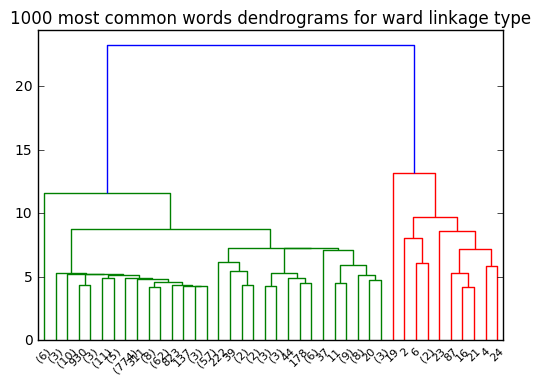

In [54]:
Z = linkage(X_1000.toarray(), method='ward' )
plt.figure()
plt.title('1000 most common words dendrograms for ward linkage type')
dn = dendrogram(Z,p=40,truncate_mode='lastp')

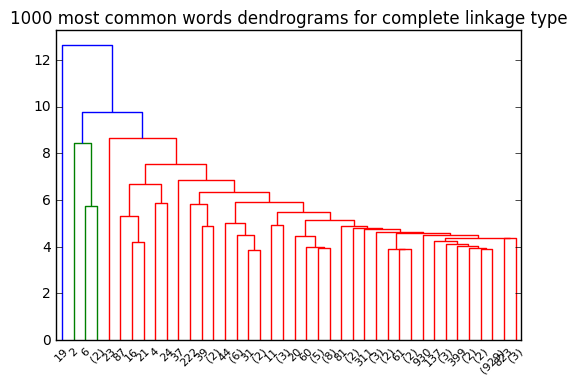

In [55]:
Z = linkage(X_1000.toarray(), method='complete' )
plt.figure()
plt.title('1000 most common words dendrograms for complete linkage type')
dn = dendrogram(Z,p=40,truncate_mode='lastp')

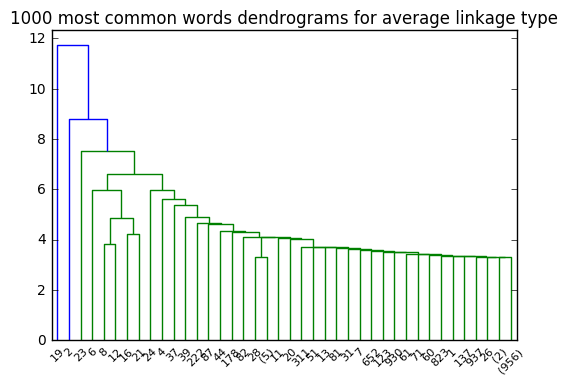

In [56]:
Z = linkage(X_1000.toarray(), method='average' )
plt.figure()
plt.title('1000 most common words dendrograms for average linkage type')
dn = dendrogram(Z,p=40,truncate_mode='lastp')

__Exercise 2.3__ (10 pts) Use SVMs trained on the training set to predict the test set.  Evaluate the performance with the ROC, PR, and confusion matrix.  Don't forget to appropriately cross-validate to tune parameters.

I firstly tune parameters with cross-validation, then I draw the performance with ROC, PR cure and show confusion matrix for all class, then I do the same thing for 'earn' class.

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [25]:
print 'best bandwidth',best_band_5fold(X_tr,y,svm.SVC)

best bandwidth 1.0


In [43]:
xx = np.linspace(0,5,10)[1:]
kfold = KFold(n_splits=5)
five_fold2 = []
for i in xx:
    svc = svm.SVC(gamma=i)
    five_fold2.append(cross_val_score(svc, X_tr, y_train, cv=kfold).mean())
print 'best ridge penalty:',xx[np.argmax(five_fold2)]

best ridge penalty: 0.555555555556


In [15]:
#generate train matrix
m, p = len(test_corpus), len(full_DF)
logN = np.log(len(train_corpus) + len(test_corpus))
X_testtr = sp.lil_matrix((m,p))
for i in xrange(m):
    tpc, doc = test_corpus[i]
    vec = np.array([(logN - np.log(test_DF[term]))*doc[term] for term in doc.keys()])
    vec = vec / np.linalg.norm(vec)
    X_testtr[i,[dict_index[term] for term in doc.keys()]] = vec

In [12]:
y_label = {}
y_train = [i[0] for i in train_corpus]
y_test = [i[0] for i in test_corpus]
for i,j in zip(set(y_train),range(8)):
    y_label[i] = j
y_train = [y_label[i]  for i in y_train if i in y_label]
y_test = [y_label[i]  for i in y_test if i in y_label]

In [25]:
y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7])
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = y_train.shape[1]
random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(gamma=0.555555555556,C=1, probability=True,random_state=random_state))
y_score = classifier.fit(X_tr, y_train).decision_function(X_testtr)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

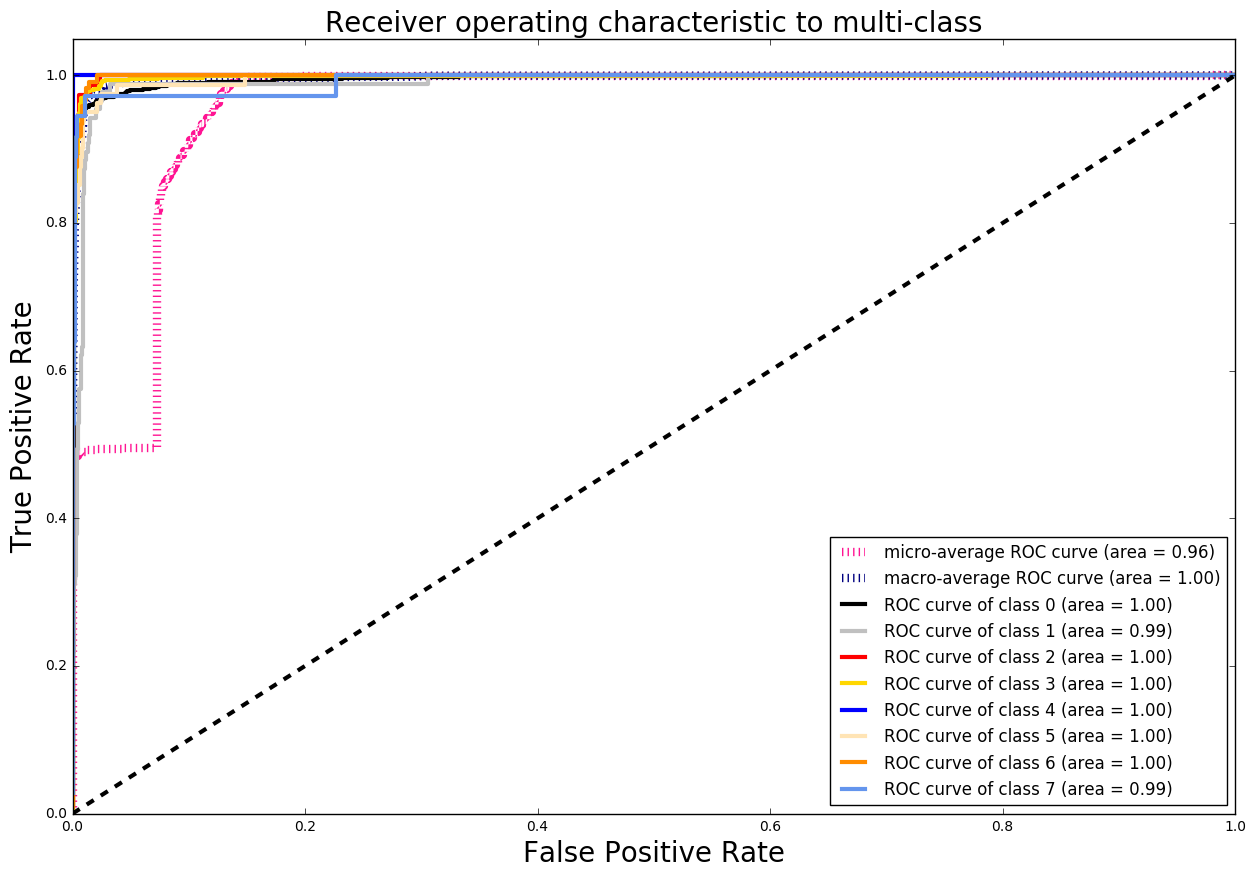

In [48]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 3
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(15,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=6)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=6)

colors = cycle(['black','silver','red','gold','blue','moccasin','darkorange','cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic to multi-class',fontsize=20)
plt.legend(loc=4)
plt.show()

In [75]:
from sklearn.metrics import average_precision_score
y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7])
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = y_train.shape[1]

# Run classifier
classifier = OneVsRestClassifier(svm.SVC(gamma=0.555555555556,C=1e-06, probability=True,random_state=random_state))

y_score = classifier.fit(X_tr, y_train).decision_function(X_testtr)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")

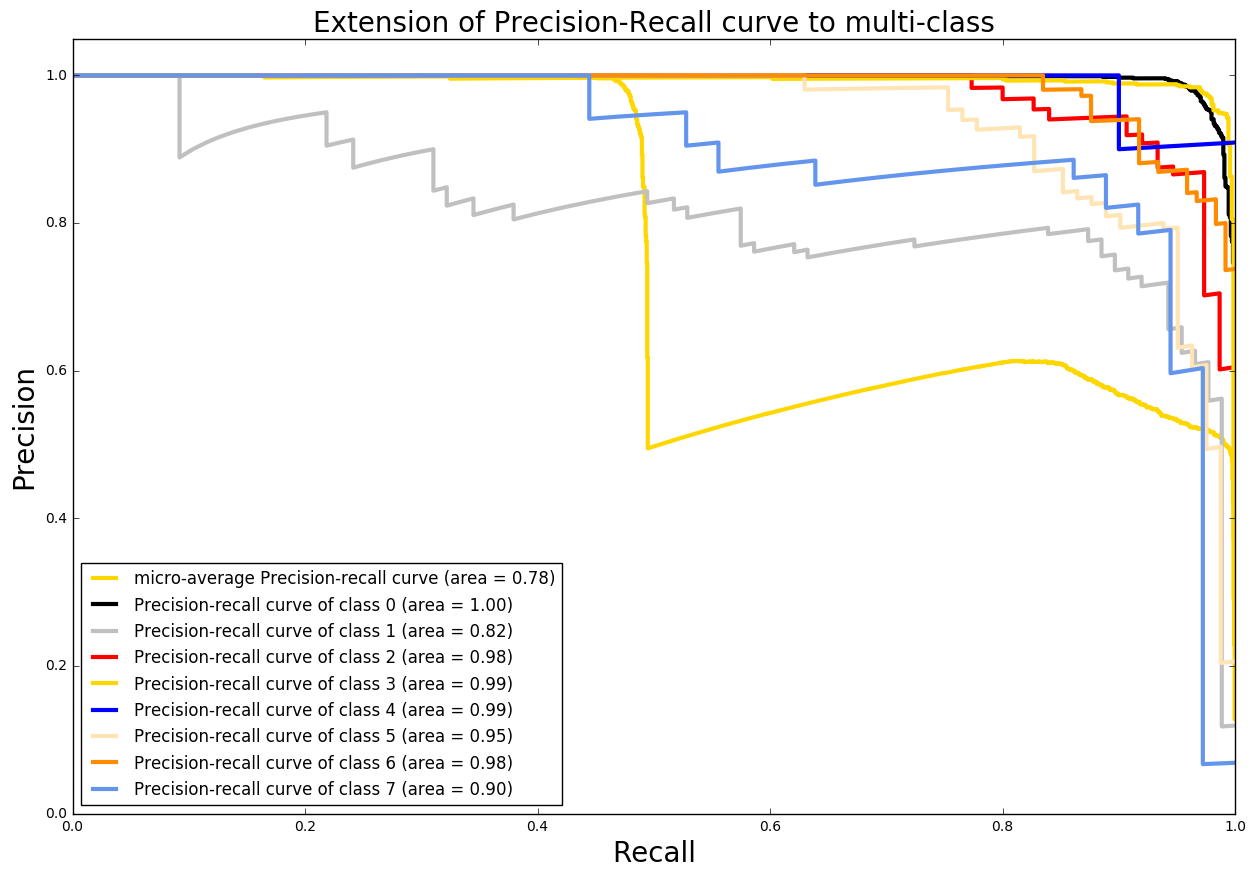

In [77]:
# Plot Precision-Recall curve for each class
plt.figure(figsize=(15,10))
plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=lw,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.title('Extension of Precision-Recall curve to multi-class',fontsize=20)
plt.legend(loc="lower left")
plt.show()

In [27]:
y_test = [i[0] for i in test_corpus]
y_test = [y_label[i]  for i in y_test if i in y_label]
svc = svm.SVC(C=1.0, gamma=0.555555555556)
svc.fit(X_tr,y)
predy = svc.predict(X_testtr)

In [28]:
print 'RBF Kernel'
confusion_matrix(y_test, predy)

RBF Kernel


array([[1076,    0,    0,    7,    0,    0,    0,    0],
       [   2,   65,    2,   13,    0,    5,    0,    0],
       [   0,    1,   71,    3,    0,    0,    0,    0],
       [  10,    0,    2,  683,    0,    0,    1,    0],
       [   0,    0,    0,    2,    8,    0,    0,    0],
       [   1,    7,    3,    4,    0,   66,    0,    0],
       [   0,    0,    0,    9,    0,    0,  111,    1],
       [   1,    0,    0,   14,    0,    0,    1,   20]])

In [29]:
svc = svm.SVC(C=1.0, gamma=0.555555555556,kernel='linear')
svc.fit(X_tr,y)
predy = svc.predict(X_testtr)
print 'Linear Kernel'
confusion_matrix(y_test, predy)

Linear Kernel


array([[1077,    0,    0,    6,    0,    0,    0,    0],
       [   2,   74,    2,    4,    0,    5,    0,    0],
       [   0,    0,   73,    2,    0,    0,    0,    0],
       [  12,    0,    2,  681,    0,    0,    1,    0],
       [   0,    0,    0,    1,    9,    0,    0,    0],
       [   0,   10,    1,    2,    0,   68,    0,    0],
       [   0,    0,    0,    7,    0,    0,  112,    2],
       [   1,    0,    1,    5,    0,    0,    3,   26]])

### classify earn

In [30]:
y_label = {}
y_train = [i[0] for i in train_corpus]
y_test = [i[0] for i in test_corpus]
for i,j in zip(set(y_train),range(8)):
    y_label[i] = j
y_train = [y_label[i]  for i in y_train if i in y_label]
y_test = [y_label[i]  for i in y_test if i in y_label]
y_train = [1 if i==0 else 0 for i in y_train]
y_test = [1 if i==0 else 0 for i in y_test]

In [31]:
svc = svm.SVC( C=1.0,gamma=0.555555555556,probability=True)
lsvc = svm.SVC(C=1.0, probability=True,kernel='linear')
svc.fit(X_tr,y_train)
lsvc.fit(X_tr,y_train)
pred = svc.predict_proba(X_testtr)
lpred = lsvc.predict_proba(X_testtr)
svcfpr, svctpr, svcthr = roc_curve(y_test, pred[:,1])
svcpre, svcrec, svcthresh = precision_recall_curve(y_test, pred[:,1])
lsvcfpr, lsvctpr, lsvcthr = roc_curve(y_test, lpred[:,1])
lsvcpre, lsvcrec, lsvcthresh = precision_recall_curve(y_test, lpred[:,1])

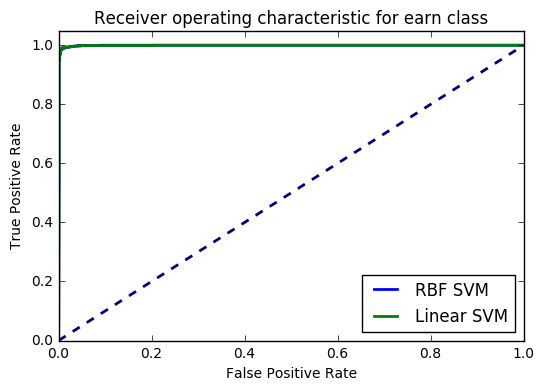

In [32]:
plt.figure()
lw = 2
plt.plot(svcfpr,svctpr,lw=lw, label='RBF SVM')
plt.plot(lsvcfpr,lsvctpr,lw=lw, label='Linear SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for earn class')
plt.legend(loc="lower right")
plt.show()

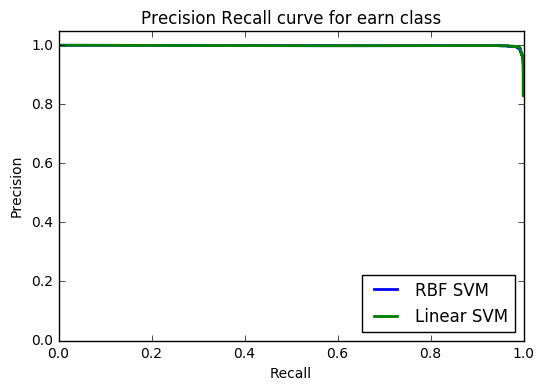

In [33]:
plt.figure()
lw = 2
plt.plot(svcrec,svcpre,lw=lw, label='RBF SVM')
plt.plot(lsvcrec,lsvcpre,lw=lw, label='Linear SVM')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for earn class')
plt.legend(loc=4)
plt.show()

In [34]:
svc = svm.SVC( gamma=0.555555555556,probability=True)
svc.fit(X_tr,y_train)
predyy = svc.predict(X_testtr)
print('rbf svc')
confusion_matrix(y_test, predyy)

rbf svc


array([[1091,   15],
       [   9, 1074]])

In [35]:
lsvc = svm.SVC(kernel='linear')
lsvc.fit(X_tr,y_train)
predyy = lsvc.predict(X_testtr)
print('linear svc')
confusion_matrix(y_test, predyy)

linear svc


array([[1088,   18],
       [   7, 1076]])